# Predicting Customer Churn for a Telecommunications Company


In this notebook I work with a data set containing customers of a telecommunications company and try to build a model that predicts customer churn. 

Being able to predict whether a customer will churn or not is obviously very useful for developing customer retention programs

In [24]:
import seaborn as sns
sns.set()

In [1]:
import pandas as pd

df_telco = pd.read_csv('small_data/Customer_telecom.csv')

df_telco.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,"""415""",382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,"""415""",371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,"""415""",358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,"""408""",375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,"""415""",330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [2]:
print('Number of observations: ', df_telco.shape[0])
print('Number of features: ', df_telco.shape[1])

Number of observations:  3333
Number of features:  21


Let's first drop column 'phone number' because it will be of no use to us.

In [3]:
df_telco = df_telco.drop('phone number', axis=1)

In [25]:
from ipywidgets import widgets
from pylib.pml_plotting import telco_plot

dropdown_values = [k for k in df_telco.columns]
widgets.interact(telco_plot(df_telco), column=dropdown_values);\

interactive(children=(Dropdown(description='column', options=('state', 'account length', 'area code', 'interna…

In [5]:
features_to_use = ['total intl minutes', 'total eve minutes', 'total day minutes',
                   'total intl calls', 'total eve calls', 'total day calls',
                  'state', 'number vmail messages', 'international plan', 'voice mail plan', 
                  'customer service calls', 'account length']

X = df_telco[features_to_use]
y = df_telco['churn']

In [6]:
print("Whole dataset churn rate: {0:.2f}".format(sum(y)/len(y)))
y.groupby(y).size()

Whole dataset churn rate: 0.14


churn
False    2850
True      483
Name: churn, dtype: int64

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total intl minutes      3333 non-null   float64
 1   total eve minutes       3333 non-null   float64
 2   total day minutes       3333 non-null   float64
 3   total intl calls        3333 non-null   int64  
 4   total eve calls         3333 non-null   int64  
 5   total day calls         3333 non-null   int64  
 6   state                   3333 non-null   object 
 7   number vmail messages   3333 non-null   int64  
 8   international plan      3333 non-null   object 
 9   voice mail plan         3333 non-null   object 
 10  customer service calls  3333 non-null   int64  
 11  account length          3333 non-null   int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 312.6+ KB


'state', 'international plan' and 'voice mail plan' are not numeric features, they are categorical

##### Encoding Categorical Variables / One-hot encoding

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer_name = 'ohe_on_all_categorical_features'
transformer = OneHotEncoder(sparse=False)
columns_to_encode = ['state', 'international plan', 'voice mail plan']

ohe_final = ColumnTransformer([
    (transformer_name, transformer, columns_to_encode)], 
    remainder='passthrough')

ohe_final.fit(X);

In [14]:
ohe_final.named_transformers_[transformer_name].categories_

[array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
        'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['no', 'yes'], dtype=object)]

In [15]:
X_transformed = ohe_final.transform(X)
print('Shape of transformed data matrix: ', X_transformed.shape)

Shape of transformed data matrix:  (3333, 64)


##### Training a classifier

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=10000)

lr.fit(X_transformed, y);

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of the complete data set:", X.shape)
print("Shape of the train data set:", X_train.shape)
print("Shape of the test data set:", X_test.shape)

Shape of the complete data set: (3333, 12)
Shape of the train data set: (2666, 12)
Shape of the test data set: (667, 12)


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

lr_pipe = Pipeline([('ohe', ohe_final),
                    ('scaler', StandardScaler()),
                    ('lr', LogisticRegression())])

lr_pipe.fit(X_train, y_train);

In [20]:
from sklearn import metrics

def model_evaluation(model, X, y_true):
    y_pred = model.predict(X)
    scores = {}
    scores['accuracy'] = round(metrics.accuracy_score(y_true, y_pred), 4)
    scores['precision'] = round(metrics.precision_score(y_true, y_pred), 4)
    scores['recall'] = round(metrics.recall_score(y_true, y_pred), 4)
    probs = model.predict_proba(X).T[1]
    precisions, recalls, thresholds = metrics.precision_recall_curve(y_true, probs)
    scores['area under precision-recall curve'] = round(metrics.auc(recalls, precisions), 4)
    return scores

def print_model_evaluation(model_name, scores):
    print('{} evaluation \n'.format(model_name))
    for metric, score in scores.items():
        print('Test {}: {}'.format(metric, score))

In [21]:
lr_pipe_score = model_evaluation(lr_pipe, X_test, y_test)
print_model_evaluation('Logistic regression', lr_pipe_score)

Logistic regression evaluation 

Test accuracy: 0.8576
Test precision: 0.5938
Test recall: 0.1881
Test area under precision-recall curve: 0.4766


##### Improving the model: random forest classifier

Instead of using logistic regression, we will use a non-linear model - random forest.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_pipe = Pipeline([('ohe', ohe_final),
                    ('rf', RandomForestClassifier(n_estimators=50, random_state=42))])

rf_gs = GridSearchCV(rf_pipe, 
                     cv=5, 
                     param_grid={'rf__max_depth': range(3, 10)}
                    )
rf_gs.fit(X_train, y_train)

rf_gs_scores = model_evaluation(rf_gs, X_test, y_test)
print_model_evaluation('Random forest', rf_gs_scores)

Random forest evaluation 

Test accuracy: 0.9205
Test precision: 0.9615
Test recall: 0.495
Test area under precision-recall curve: 0.8341


Let's compare the two models we built in this notebook using our testing data set and visualize their performance by plotting the precision-recall curve.

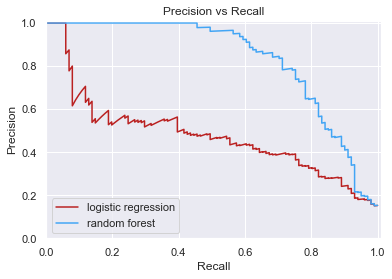

In [26]:
import matplotlib.pyplot as plt

precisions_lr, recalls_lr, thresholds = metrics.precision_recall_curve(y_test,
                                                                 lr_pipe.predict_proba(X_test).T[1])

precisions_rf, recalls_rf, thresholds = metrics.precision_recall_curve(y_test,
                                                                 rf_gs.predict_proba(X_test).T[1])

plt.plot(recalls_lr, precisions_lr, c='#ba2121ff', label='logistic regression')
plt.plot(recalls_rf, precisions_rf, c='#42a5f5ff', label='random forest')

plt.xlim([0., 1.01])
plt.ylim([0., 1.01])
plt.xlabel('Recall') 
plt.ylabel('Precision')
plt.title('Precision vs Recall')
plt.legend();